In [14]:
# =============================================
# Cell 1: Environment Setup and Library Imports
# =============================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR  

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

np.random.seed(42)
import random
random.seed(42)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📊 Pandas version: 2.3.2
🔢 NumPy version: 1.26.4


In [15]:
# ==========================================
# Cell 2: Data Loading & Initial Exploration
# ==========================================

# Load dataset from CSV file
df = pd.read_csv('Biomass Data 04_11.csv')
print("📁 Dataset loaded successfully!")

# Display dataset structure and basic info
print(f"\n📊 Dataset Shape: {df.shape}")  # (rows, columns)
print(f"   → {df.shape[0]} rows (observations)")
print(f"   → {df.shape[1]} columns (features + target)")

# Preview first few rows
print("\n🔍 First 5 rows of the dataset:")
print("=" * 80)
display(df.head())

# Column info and data types
print("\n📋 Column Information:")
print("=" * 50)
print(df.info())

# Summary stats for numeric features
print("\n📈 Statistical Summary of Numerical Columns:")
print("=" * 60)
display(df.describe())

# Check for missing values
print("\n❗ Missing Values Analysis:")
print("=" * 40)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_info = missing_info[missing_info['Missing_Count'] > 0]

if len(missing_info) > 0:
    print("Columns with missing values:")
    display(missing_info)
else:
    print("✅ No missing values found!")

# Identify categorical-like columns
print("\n🏷️  Categorical Columns Analysis:")
print("=" * 45)
for column in df.columns:
    unique_count = df[column].nunique()
    if unique_count < 20 and df[column].dtype == 'object':
        print(f"{column}: {unique_count} unique → {list(df[column].unique())}")
    elif unique_count < 10 and df[column].dtype in ['int64', 'float64']:
        print(f"{column}: {unique_count} unique → {sorted(df[column].unique())}")

# Basic data quality checks
print("\n🔍 Data Quality Checks:")
print("=" * 35)
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# Identify constant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
if constant_columns:
    print(f"Constant columns (consider dropping): {constant_columns}")
else:
    print("✅ No constant columns found")

# Memory usage overview
print(f"\n💾 Dataset Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n" + "="*80)
print("✅ Initial data exploration completed!")
print("📝 Next step: Specify target variable for EDA")
print("="*80)

# Target variable definition
target_variable = '%Glucose Yield'  # Update as needed
print(f"\n🎯 Target Variable: {target_variable}")
if target_variable in df.columns:
    print(f"   → Range: {df[target_variable].min():.3f} to {df[target_variable].max():.3f}")
    print(f"   → Mean: {df[target_variable].mean():.3f}")
    print(f"   → Std Dev: {df[target_variable].std():.3f}")
else:
    print(f"❌ Target variable '{target_variable}' not found in dataset!")


📁 Dataset loaded successfully!

📊 Dataset Shape: (533, 32)
   → 533 rows (observations)
   → 32 columns (features + target)

🔍 First 5 rows of the dataset:


,Reference,Ref No.,System No.,Data Point No.,Figure No. in paper,Index,Feed,Moisture Content (kg water/kg dry biomass),Glucan Content (% dry basis),Hemicellulose Content (% dry basis),Lignin Content (% dry basis),Country of Origin,Pre-treatment,Main-Pretreatment Agent,SO2 Concentration (%),CO2 pressure,Ammonia Loading (kg ammonia / kg dry biomass),Hot water solid-to-liquid ratio,Pretreatment Time (h),Pretreatment Temperature (°C),Hydrolysis Method,Hydrolysis Time(h),Conversion Temperature (°C),pH,Enzyme Name,enzyme unit is FPU (Y/N),Enzyme loading (FPU/g dry biomass),Enzyme loading (mg / g glucan),Severity Factor,Microbial Expression Used,% Xylose Yield,%Glucose Yield
0,Gao et al. (2011),R1,S1,D1,Figure -7(A),R1-S1-D1,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,3.952602,2.0594,N,3.652094,25.690589
1,Gao et al. (2011),R1,S1,D2,Figure -7(A),R1-S1-D2,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,7.916007,2.0594,N,6.370370,41.320834
2,Gao et al. (2011),R1,S1,D3,Figure -7(A),R1-S1-D3,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,11.943337,2.0594,N,9.346216,49.141093
3,Gao et al. (2011),R1,S1,D4,Figure -7(A),R1-S1-D4,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,15.932726,2.0594,N,12.386473,55.303799
4,Gao et al. (2011),R1,S1,D5,Figure -7(A),R1-S1-D5,corn stover,0.6,34.4,22.4,11.0,usa,AFEX,ammonia,NaN,NaN,1.0,NaN,0.25,130.0,Enzymatic,24.0,50,4.75,Accellerase 1000,N,NaN,19.945518,2.0594,N,15.491143,60.386704



📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Reference                                      533 non-null    object 
 1   Ref No.                                        533 non-null    object 
 2   System No.                                     533 non-null    object 
 3   Data Point No.                                 533 non-null    object 
 4   Figure No. in paper                            533 non-null    object 
 5   Index                                          533 non-null    object 
 6   Feed                                           533 non-null    object 
 7   Moisture Content (kg water/kg dry biomass)     533 non-null    float64
 8   Glucan Content (% dry basis)                   533 non-null    float64
 9   Hemicellulose Content (% dry ba

,Moisture Content (kg water/kg dry biomass),Glucan Content (% dry basis),Hemicellulose Content (% dry basis),Lignin Content (% dry basis),SO2 Concentration (%),CO2 pressure,Ammonia Loading (kg ammonia / kg dry biomass),Hot water solid-to-liquid ratio,Pretreatment Time (h),Pretreatment Temperature (°C),Hydrolysis Time(h),Conversion Temperature (°C),pH,Enzyme loading (FPU/g dry biomass),Enzyme loading (mg / g glucan),Severity Factor,% Xylose Yield,%Glucose Yield
count,533.000000,533.000000,533.000000,504.000000,152.000000,45.000000,30.000000,56.0,427.000000,427.000000,533.000000,533.000000,504.000000,268.000000,290.000000,427.000000,79.000000,533.000000
mean,0.115019,38.858131,15.991423,16.387017,10.815789,26.666667,1.400000,1.1,2.330211,136.079625,43.768283,55.384615,5.360714,18.078358,340.694569,2.747085,34.696830,45.678703
std,0.245624,4.721456,7.634175,12.687126,2.808268,6.741999,0.498273,0.0,5.516006,41.576992,32.112432,22.717046,1.439908,8.057693,606.219013,0.928359,26.634477,28.361783
min,0.000000,16.700000,1.772820,0.651000,3.000000,10.000000,1.000000,1.1,0.083333,25.000000,0.000000,45.000000,4.750000,10.000000,2.150000,-0.289500,0.845919,0.000000
25%,0.000000,36.903173,6.330374,5.884146,12.000000,30.000000,1.000000,1.1,0.416667,121.000000,24.000000,50.000000,4.800000,10.000000,25.882500,2.396500,11.974445,23.282350
50%,0.000000,38.900000,19.500000,17.000000,12.000000,30.000000,1.000000,1.1,0.833333,135.000000,48.000000,50.000000,5.000000,20.000000,54.195881,2.729499,27.388960,36.215565
75%,0.205000,41.940920,21.140000,20.757638,12.000000,30.000000,2.000000,1.1,1.333333,165.000000,72.000000,50.000000,5.000000,30.000000,60.444282,3.266023,60.476475,72.389180
max,1.500000,43.765240,26.000000,42.000000,12.000000,30.000000,2.000000,1.1,24.000000,220.000000,168.000000,160.000000,11.500000,30.000000,2395.209000,4.709300,88.002390,98.805350



❗ Missing Values Analysis:
Columns with missing values:


,Column,Missing_Count,Missing_Percentage
10,Lignin Content (% dry basis),29,5.440901
12,Pre-treatment,106,19.887430
13,Main-Pretreatment Agent,323,60.600375
14,SO2 Concentration (%),381,71.482176
15,CO2 pressure,488,91.557223
16,Ammonia Loading (kg ammonia / kg dry biomass),503,94.371482
17,Hot water solid-to-liquid ratio,477,89.493433
18,Pretreatment Time (h),106,19.887430
19,Pretreatment Temperature (°C),106,19.887430
23,pH,29,5.440901



🏷️  Categorical Columns Analysis:
Reference: 9 unique → ['Gao et al. (2011)', 'Kang et al.(2025)', 'Soudham et al(2015)', 'Banerjee et al,(2011)', 'Benkun Qi(2018)', 'Miao Gao et al. (2010)', 'Horn et al. (2011)', 'Krishnan et al. (2010)', 'Yamamoto et al. (2014)']
Ref No.: 9 unique → ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']
System No.: 9 unique → ['S1', 'S2', 'S3', 'S4', 'S5', 'S1 -(Black curve)', 'S6', 'S7', 'S8']
Feed: 10 unique → ['corn stover', 'spruce wood', 'Pine stem wood', 'Birch wood', 'Reed canary grass', 'Pine bark', 'wheat straw', 'rice straw', 'sugarcane bagasse', 'cane leaf']
Moisture Content (kg water/kg dry biomass): 6 unique → [0.0, 0.1, 0.11, 0.205, 0.6, 1.5]
Country of Origin: 4 unique → ['usa', 'sweden', 'china', 'finland']
Pre-treatment: 8 unique → ['AFEX', 'Hot water', nan, 'Acid', 'Ionic liquid', 'Alkali', 'SC-CO2', 'steam explosion', 'SEW fractionation']
Main-Pretreatment Agent: 5 unique → ['ammonia', 'water', nan, 'hydrogen peroxide', 'CO2', 'st

In [16]:
# ===========================
# Cell 3: Data Preprocessing 
# ===========================
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("🛠️ DATA PREPROCESSING")

# Create a working copy to preserve raw data
df_processed = df.copy()

# Select the relevant feature range (adjust for your dataset)
feed_column = 'Feed'
glucose_yield_column = '%Glucose Yield'

feed_pos = df_processed.columns.get_loc(feed_column)
glucose_pos = df_processed.columns.get_loc(glucose_yield_column)
df_processed = df_processed.iloc[:, feed_pos:glucose_pos+1]

print(f"✅ Dataset shape: {df_processed.shape}")

# Identify numeric and categorical columns
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

# 1. Handle missing values (mandatory for ML models)
if numerical_cols:
    num_imputer = SimpleImputer(strategy='median')
    df_processed[numerical_cols] = num_imputer.fit_transform(df_processed[numerical_cols])
    print(f"✅ Imputed {len(numerical_cols)} numerical columns")

if categorical_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_processed[categorical_cols] = cat_imputer.fit_transform(df_processed[categorical_cols])
    print(f"✅ Imputed {len(categorical_cols)} categorical columns")

# 2. Encode categorical columns as numeric (for model compatibility)
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
print(f"✅ Encoded {len(categorical_cols)} categorical columns")

# 3. Remove duplicate and constant-value columns to reduce redundancy
df_processed = df_processed.drop_duplicates()
constant_cols = [c for c in df_processed.columns if df_processed[c].nunique() == 1]
df_processed = df_processed.drop(columns=constant_cols)

# 4. Split dataset into features (X) and target (y)
target_variable = glucose_yield_column
X = df_processed.drop(columns=[target_variable])
y = df_processed[target_variable]

# 5. Standardize features (essential for algorithms like SVR)
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Summary of preprocessing results
print(f"\n✅ Preprocessing complete!")
print(f"   Features: {X_scaled.shape}")
print(f"   Target: {y.shape}")
print(f"   Missing values: {X_scaled.isnull().sum().sum()}")

🛠️ DATA PREPROCESSING
✅ Dataset shape: (533, 26)
✅ Imputed 18 numerical columns
✅ Imputed 8 categorical columns
✅ Encoded 8 categorical columns

✅ Preprocessing complete!
   Features: (533, 24)
   Target: (533,)
   Missing values: 0


In [17]:
# ===========================
# Cell 4 : Splitting the data
# ===========================

print("🚂 TRAIN/TEST SPLIT AND MODEL TRAINING")
print("=" * 50)

# STEP 1: Split the data into training and testing sets
print(f"1️⃣ DATA SPLITTING")
print("=" * 20)

# Fix random state to ensure consistent results across runs
random_state = 42

# Divide dataset: 70% for training, 30% for testing
# Provides a balanced split for model learning and evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,           # Scaled feature set
    y,                  # Target variable (%Glucose Yield)
    test_size=0.3,      # Proportion reserved for testing
    random_state=random_state,  # Ensures reproducibility
    stratify=None       # Not required since it's a regression task
)

# Display data split summary
print(f"✅ Data split completed:")
print(f"   → Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   → Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   → Features: {X_train.shape[1]}")

# Compare target variable distribution between train and test sets
print(f"\n📊 Target variable distribution:")
print(f"   Training set:")
print(f"     → Mean: {y_train.mean():.3f}")
print(f"     → Std: {y_train.std():.3f}")
print(f"     → Range: {y_train.min():.3f} to {y_train.max():.3f}")
print(f"   Test set:")
print(f"     → Mean: {y_test.mean():.3f}")
print(f"     → Std: {y_test.std():.3f}")
print(f"     → Range: {y_test.min():.3f} to {y_test.max():.3f}")

🚂 TRAIN/TEST SPLIT AND MODEL TRAINING
1️⃣ DATA SPLITTING
✅ Data split completed:
   → Training set: 373 samples (70.0%)
   → Test set: 160 samples (30.0%)
   → Features: 24

📊 Target variable distribution:
   Training set:
     → Mean: 45.012
     → Std: 28.385
     → Range: 0.563 to 98.722
   Test set:
     → Mean: 47.233
     → Std: 28.335
     → Range: 0.000 to 98.805


In [18]:
# ==============================
# Cell 5 : Train Final SVR Model
# ==============================
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import joblib

print("🎯 TRAINING FINAL MODEL")
print("=" * 60)

# Initialize the optimized SVR model with tuned hyperparameters
final_svr_model = SVR(
    kernel='rbf',       # Radial Basis Function kernel for nonlinear relationships
    C=500,              # Regularization parameter (higher = less regularization)
    epsilon=1.0,        # Tolerance for error margin in regression
    gamma=0.05,         # Kernel coefficient controlling decision boundary flexibility
    shrinking=True,     # Enables faster optimization
    cache_size=500,     # Memory (MB) for kernel cache
    tol=1e-3            # Convergence tolerance
)

# Train the final SVR model on the training dataset
final_svr_model.fit(X_train, y_train)

# Predict outputs for both training and testing datasets
y_train_pred_final = final_svr_model.predict(X_train)
y_test_pred_final = final_svr_model.predict(X_test)

# Evaluate model performance using key regression metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_final))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_final))
test_r2 = r2_score(y_test, y_test_pred_final)

# Display performance summary
print(f"Best Parameters: C=500, epsilon=1.0, gamma=0.05")
print(f"\nPerformance:")
print(f"  Train RMSE: {train_rmse:.3f}")
print(f"  Test RMSE:  {test_rmse:.3f}")
print(f"  Test R²:    {test_r2:.4f}")
print(f"  Gap:        {(test_rmse - train_rmse):.3f}")  # Indicates generalization quality

# Save the trained model and the scaler for future predictions
joblib.dump(final_svr_model, "svr_final.pkl")
joblib.dump(scaler, "scaler_final.pkl")

print(f"\n✅ Model saved: svr_final.pkl")
print("=" * 60)

🎯 TRAINING FINAL MODEL
Best Parameters: C=500, epsilon=1.0, gamma=0.05

Performance:
  Train RMSE: 9.821
  Test RMSE:  15.449
  Test R²:    0.7009
  Gap:        5.627

✅ Model saved: svr_final.pkl


📊 MODEL EVALUATION AND PERFORMANCE METRICS
1️⃣ REGRESSION PERFORMANCE METRICS
📈 Training Set Performance:
   → MSE: 96.4578
   → RMSE: 9.8213
   → MAE: 4.8706
   → R²: 0.8800
   → MAPE: 28.49%
   → Pearson Correlation: 0.9390 (p-value: 5.04e-174)

🎯 Test Set Performance (Generalization):
   → MSE: 238.6628
   → RMSE: 15.4487
   → MAE: 7.7538
   → R²: 0.7009
   → MAPE: 47.11%
   → Pearson Correlation: 0.8475 (p-value: 2.60e-45)

🔍 Performance Interpretation:
   → Good model performance (R² > 0.6)
   → Average prediction error: ±7.75 percentage points
   → RMSE represents typical prediction error: ±15.45%

2️⃣ OVERFITTING ANALYSIS
📊 Training vs Test Comparison:
   → R² difference (train - test): 0.1791
   → RMSE difference (test - train): 5.6274
   ⚠️ Significant overfitting detected (R² gap > 0.1)
   → Model memorizes training data but generalizes poorly

3️⃣ PERFORMANCE VISUALIZATIONS


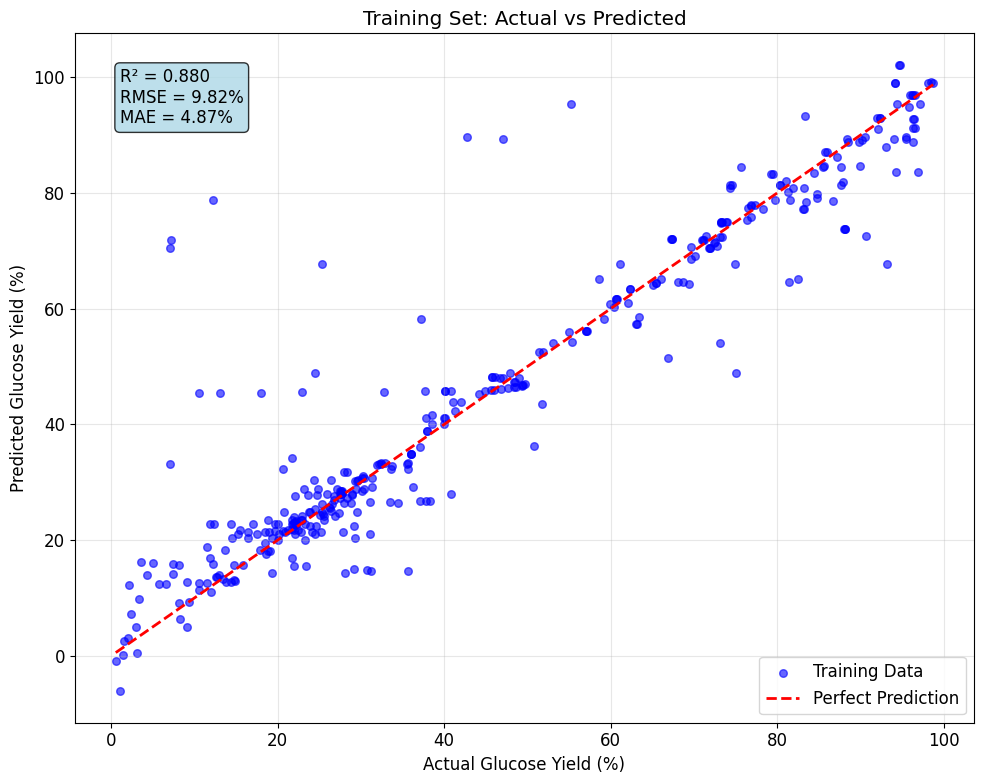

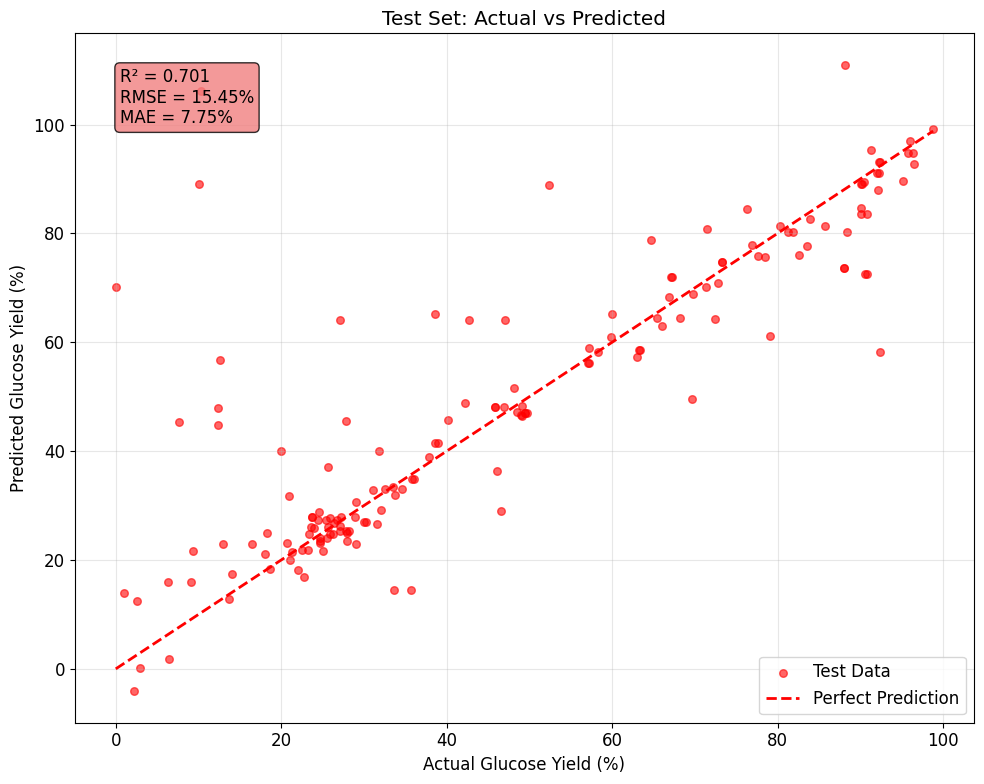

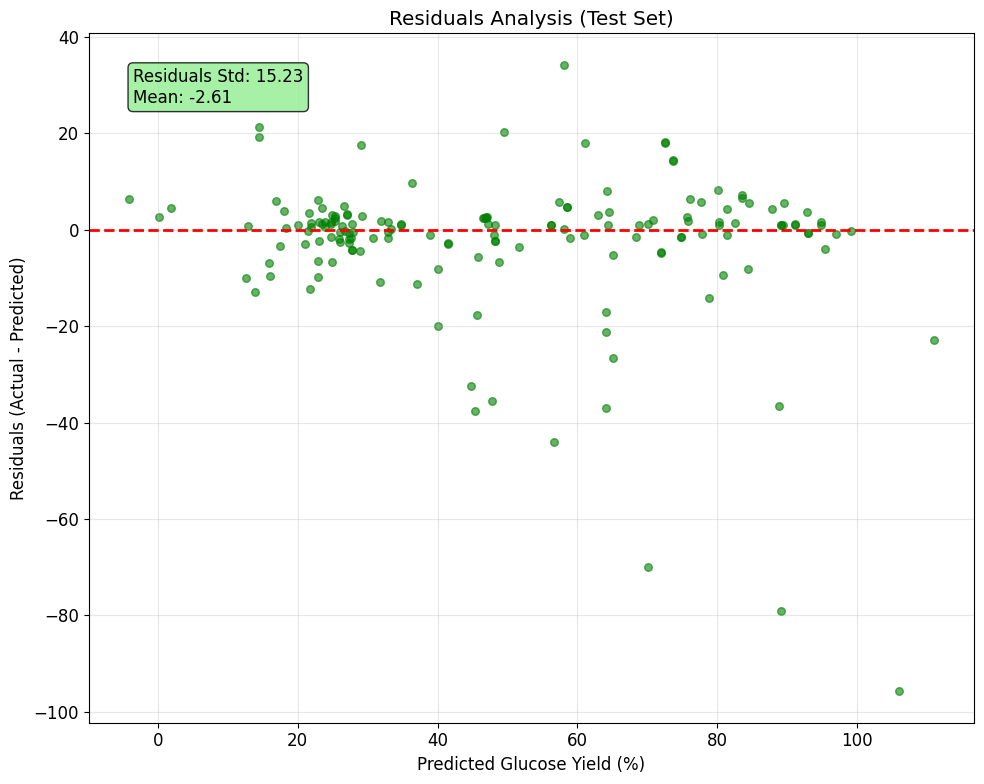

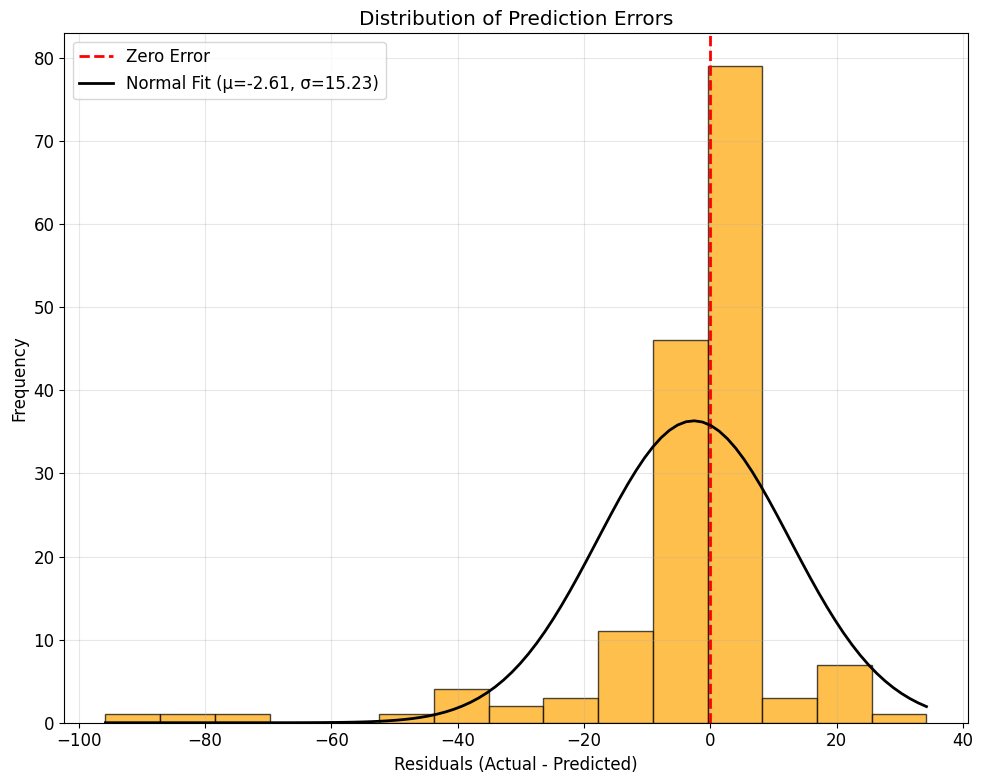


4️⃣ FEATURE IMPORTANCE ANALYSIS
⚠️ SVR doesn't have built-in feature importance
   Using permutation importance (computational cost warning)
   Computing permutation importance...

🔍 Top 10 Most Important Features for Glucose Yield Prediction:
    1. Lignin Content (% dry basis)       : 31.28% (±0.0689)
    2. Hydrolysis Time(h)                 : 22.11% (±0.0348)
    3. Hemicellulose Content (% dry basis): 14.74% (±0.0431)
    4. Severity Factor                    : 8.86% (±0.0710)
    5. Pre-treatment                      : 3.59% (±0.0411)
    6. % Xylose Yield                     : 3.20% (±0.0164)
    7. Pretreatment Temperature (°C)      : 2.66% (±0.0293)
    8. Enzyme loading (FPU/g dry biomass) : 2.19% (±0.0110)
    9. Glucan Content (% dry basis)       : 2.13% (±0.0402)
   10. enzyme unit is FPU (Y/N)           : 1.70% (±0.0103)


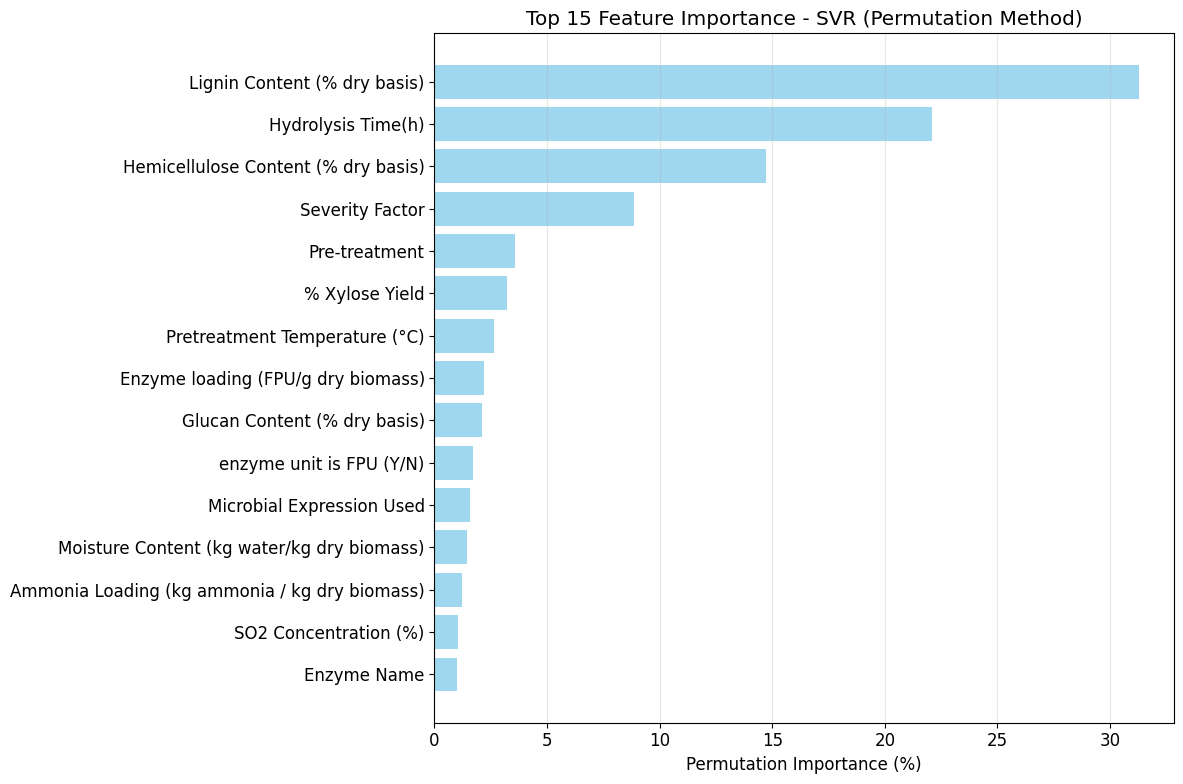


✅ All SVR plots saved to 'svr_plots/' directory

5️⃣ FINAL PERFORMANCE SUMMARY
🎯 SVR Model Performance on Biomass Conversion Data:
   → Test Set R²: 0.701 (70.1% variance explained)
   → Test Set RMSE: 15.45% glucose yield
   → Test Set MAE: 7.75% glucose yield
   → Average Absolute Error: 47.1%

📊 Business Impact Translation:
   → Model explains 70.1% of glucose yield variation
   → Typical prediction error: ±7.8 percentage points
   → 68% of predictions within ±15.4% of actual yield

⚠️ Areas for Improvement:
   → Reduce overfitting (R² gap: 0.179)
   → Try reducing C parameter or increasing epsilon
   → Consider hyperparameter tuning (C, epsilon, gamma)
🎯 Next step: Hyperparameter Tuning to Optimize Performance


In [19]:
# =================================================
# Cell 6: Model Evaluation and Performance Metrics
# =================================================
print("📊 MODEL EVALUATION AND PERFORMANCE METRICS")
print("=" * 55)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from scipy import stats
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

os.makedirs('svr_plots', exist_ok=True)

# Generate predictions
y_train_pred = final_svr_model.predict(X_train)
y_test_pred = final_svr_model.predict(X_test)

print(f"1️⃣ REGRESSION PERFORMANCE METRICS")
print("=" * 40)

def calculate_mape(y_true, y_pred):
    mask = y_true > 1
    if np.sum(mask) > 0:
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        return np.nan

# Training Set Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = calculate_mape(y_train, y_train_pred)
train_corr, train_p_value = pearsonr(y_train, y_train_pred)

print(f"📈 Training Set Performance:")
print(f"   → MSE: {train_mse:.4f}")
print(f"   → RMSE: {train_rmse:.4f}")
print(f"   → MAE: {train_mae:.4f}")
print(f"   → R²: {train_r2:.4f}")
print(f"   → MAPE: {train_mape:.2f}%")
print(f"   → Pearson Correlation: {train_corr:.4f} (p-value: {train_p_value:.2e})")

# Test Set Metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = calculate_mape(y_test, y_test_pred)
test_corr, test_p_value = pearsonr(y_test, y_test_pred)

print(f"\n🎯 Test Set Performance (Generalization):")
print(f"   → MSE: {test_mse:.4f}")
print(f"   → RMSE: {test_rmse:.4f}")
print(f"   → MAE: {test_mae:.4f}")
print(f"   → R²: {test_r2:.4f}")
print(f"   → MAPE: {test_mape:.2f}%")
print(f"   → Pearson Correlation: {test_corr:.4f} (p-value: {test_p_value:.2e})")

print(f"\n🔍 Performance Interpretation:")
if test_r2 > 0.8:
    print(f"   → Excellent model performance (R² > 0.8)")
elif test_r2 > 0.6:
    print(f"   → Good model performance (R² > 0.6)")
elif test_r2 > 0.4:
    print(f"   → Moderate model performance (R² > 0.4)")
else:
    print(f"   → Poor model performance (R² < 0.4)")
print(f"   → Average prediction error: ±{test_mae:.2f} percentage points")
print(f"   → RMSE represents typical prediction error: ±{test_rmse:.2f}%")

# Overfitting Analysis
print(f"\n2️⃣ OVERFITTING ANALYSIS")
print("=" * 30)

r2_diff = train_r2 - test_r2
rmse_diff = test_rmse - train_rmse

print(f"📊 Training vs Test Comparison:")
print(f"   → R² difference (train - test): {r2_diff:.4f}")
print(f"   → RMSE difference (test - train): {rmse_diff:.4f}")

if r2_diff > 0.1:
    print(f"   ⚠️ Significant overfitting detected (R² gap > 0.1)")
    print(f"   → Model memorizes training data but generalizes poorly")
elif r2_diff > 0.05:
    print(f"   ⚠️ Moderate overfitting (R² gap > 0.05)")
    print(f"   → Consider adjusting C parameter or epsilon")
else:
    print(f"   ✅ Minimal overfitting (R² gap < 0.05)")

# Performance Visualizations
print(f"\n3️⃣ PERFORMANCE VISUALIZATIONS")
print("=" * 35)

# Plot 1: Training Set - Actual vs Predicted
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=30, label='Training Data')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Glucose Yield (%)')
ax1.set_ylabel('Predicted Glucose Yield (%)')
ax1.set_title('Training Set: Actual vs Predicted')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.text(0.05, 0.95, f'R² = {train_r2:.3f}\nRMSE = {train_rmse:.2f}%\nMAE = {train_mae:.2f}%',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
plt.tight_layout()
plt.savefig('svr_plots/01_training_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Test Set - Actual vs Predicted
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(y_test, y_test_pred, alpha=0.6, color='red', s=30, label='Test Data')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Glucose Yield (%)')
ax2.set_ylabel('Predicted Glucose Yield (%)')
ax2.set_title('Test Set: Actual vs Predicted')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.text(0.05, 0.95, f'R² = {test_r2:.3f}\nRMSE = {test_rmse:.2f}%\nMAE = {test_mae:.2f}%',
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
plt.tight_layout()
plt.savefig('svr_plots/02_test_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Residuals Analysis
residuals_test = y_test - y_test_pred
fig3, ax3 = plt.subplots(figsize=(10, 8))
ax3.scatter(y_test_pred, residuals_test, alpha=0.6, color='green', s=30)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Predicted Glucose Yield (%)')
ax3.set_ylabel('Residuals (Actual - Predicted)')
ax3.set_title('Residuals Analysis (Test Set)')
ax3.grid(True, alpha=0.3)
residuals_std = np.std(residuals_test)
ax3.text(0.05, 0.95, f'Residuals Std: {residuals_std:.2f}\nMean: {np.mean(residuals_test):.2f}',
         transform=ax3.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
plt.tight_layout()
plt.savefig('svr_plots/03_residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 4: Prediction Error Distribution
fig4, ax4 = plt.subplots(figsize=(10, 8))
ax4.hist(residuals_test, bins=15, alpha=0.7, color='orange', edgecolor='black')
ax4.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax4.set_xlabel('Residuals (Actual - Predicted)')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Prediction Errors')
ax4.grid(True, alpha=0.3)

mu, sigma = stats.norm.fit(residuals_test)
x = np.linspace(residuals_test.min(), residuals_test.max(), 100)
y = stats.norm.pdf(x, mu, sigma) * len(residuals_test) * (residuals_test.max() - residuals_test.min()) / 15
ax4.plot(x, y, 'k-', linewidth=2, label=f'Normal Fit (μ={mu:.2f}, σ={sigma:.2f})')
ax4.legend()
plt.tight_layout()
plt.savefig('svr_plots/04_error_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance Analysis
print(f"\n4️⃣ FEATURE IMPORTANCE ANALYSIS")
print("=" * 40)
print("⚠️ SVR doesn't have built-in feature importance")
print("   Using permutation importance (computational cost warning)")
print("   Computing permutation importance...")

perm_importance = permutation_importance(
    final_svr_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
})

importance_df['Importance'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
importance_df = importance_df.sort_values('Importance', ascending=False)

print(f"\n🔍 Top 10 Most Important Features for Glucose Yield Prediction:")
print("=" * 70)
for i, (idx, row) in enumerate(importance_df.head(10).iterrows(), 1):
    print(f"   {i:2d}. {row['Feature']:<35}: {row['Importance']:.2f}% (±{row['Std']:.4f})")

# Plot 5: Feature Importance
fig5, ax5 = plt.subplots(figsize=(12, 8))
top_features = importance_df.head(15)
ax5.barh(range(len(top_features)), top_features['Importance'], color='skyblue', alpha=0.8)
ax5.set_yticks(range(len(top_features)))
ax5.set_yticklabels(top_features['Feature'])
ax5.set_xlabel('Permutation Importance (%)')
ax5.set_title('Top 15 Feature Importance - SVR (Permutation Method)')
ax5.invert_yaxis()
ax5.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('svr_plots/05_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ All SVR plots saved to 'svr_plots/' directory")

# Final Performance Summary
print(f"\n5️⃣ FINAL PERFORMANCE SUMMARY")
print("=" * 35)
print(f"🎯 SVR Model Performance on Biomass Conversion Data:")
print(f"   → Test Set R²: {test_r2:.3f} ({test_r2*100:.1f}% variance explained)")
print(f"   → Test Set RMSE: {test_rmse:.2f}% glucose yield")
print(f"   → Test Set MAE: {test_mae:.2f}% glucose yield")
print(f"   → Average Absolute Error: {test_mape:.1f}%")

print(f"\n📊 Business Impact Translation:")
print(f"   → Model explains {test_r2*100:.1f}% of glucose yield variation")
print(f"   → Typical prediction error: ±{test_mae:.1f} percentage points")
print(f"   → 68% of predictions within ±{test_rmse:.1f}% of actual yield")

print(f"\n⚠️ Areas for Improvement:")
if r2_diff > 0.1:
    print(f"   → Reduce overfitting (R² gap: {r2_diff:.3f})")
    print(f"   → Try reducing C parameter or increasing epsilon")
if test_r2 < 0.7:
    print(f"   → Improve overall prediction accuracy (R² = {test_r2:.3f})")
print(f"   → Consider hyperparameter tuning (C, epsilon, gamma)")

print("=" * 70)
print("🎯 Next step: Hyperparameter Tuning to Optimize Performance")
print("=" * 70)

In [20]:
# ===================================================================
# Cell 7: Export Metrics to Excel (Neat, Append-Safe, Auto-Formatted)
# ===================================================================
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import skew, kurtosis, pearsonr
from openpyxl import load_workbook
from openpyxl.styles import Alignment
from openpyxl.utils import get_column_letter

# Install openpyxl if not available
try:
    import openpyxl
except ImportError:
    import subprocess
    import sys
    print("📦 Installing openpyxl...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "openpyxl"])
    import openpyxl

print("💾 EXPORTING METRICS TO EXCEL")
print("=" * 60)

# --- SETTINGS ---
MODEL_NAME = 'SVR'
excel_file = 'Model_Comparison_Results.xlsx'

# --- CALCULATE METRICS ---
train_mape = calculate_mape(y_train, y_train_pred)
test_mape = calculate_mape(y_test, y_test_pred)
train_corr, _ = pearsonr(y_train, y_train_pred)
test_corr, _ = pearsonr(y_test, y_test_pred)
r2_diff = train_r2 - test_r2
rmse_diff = test_rmse - train_rmse

metrics_data = {
    'Model': MODEL_NAME,
    'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    
    # Training Metrics
    'Train_RMSE': train_rmse,
    'Train_MAE': train_mae,
    'Train_R2': train_r2,
    'Train_MAPE': train_mape,
    'Train_Pearson': train_corr,
    
    # Test Metrics
    'Test_RMSE': test_rmse,
    'Test_MAE': test_mae,
    'Test_R2': test_r2,
    'Test_MAPE': test_mape,
    'Test_Pearson': test_corr,
    
    # Overfitting Analysis
    'R2_Gap': r2_diff,
    'RMSE_Gap': rmse_diff,
    'Overfitting_Level': 'Significant' if r2_diff > 0.1 else ('Moderate' if r2_diff > 0.05 else 'Minimal'),
    
    # Residuals Statistics
    'Residuals_Mean': np.mean(residuals_test),
    'Residuals_Std': np.std(residuals_test),
    'Residuals_Min': np.min(residuals_test),
    'Residuals_Max': np.max(residuals_test),
    'Residuals_Q25': np.percentile(residuals_test, 25),
    'Residuals_Q75': np.percentile(residuals_test, 75),
    'Residuals_Skewness': skew(residuals_test),
    'Residuals_Kurtosis': kurtosis(residuals_test),
    
    # Error Distribution
    'Within_2pct': (np.abs(residuals_test) <= 2).sum() / len(residuals_test) * 100,
    'Within_5pct': (np.abs(residuals_test) <= 5).sum() / len(residuals_test) * 100,
    'Within_10pct': (np.abs(residuals_test) <= 10).sum() / len(residuals_test) * 100,
    
    # Dataset Info
    'Train_Samples': len(y_train),
    'Test_Samples': len(y_test),
    'N_Features': X_train.shape[1]
}

metrics_df = pd.DataFrame([metrics_data])

# --- EXPORT TO EXCEL ---
try:
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
        existing_metrics = pd.read_excel(excel_file, sheet_name='Metrics')
        existing_metrics = existing_metrics[existing_metrics['Model'] != MODEL_NAME]
        combined_metrics = pd.concat([existing_metrics, metrics_df], ignore_index=True)
        combined_metrics.to_excel(writer, sheet_name='Metrics', index=False)
        importance_df.head(15).to_excel(writer, sheet_name=f'{MODEL_NAME}_Features', index=False)
    print(f"✅ Updated existing file: {excel_file}")
    
except FileNotFoundError:
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='w') as writer:
        metrics_df.to_excel(writer, sheet_name='Metrics', index=False)
        importance_df.head(15).to_excel(writer, sheet_name=f'{MODEL_NAME}_Features', index=False)
    print(f"✅ Created new file: {excel_file}")

# --- NEAT FORMATTING (auto width + wrap text) ---
wb = load_workbook(excel_file)
for sheet in wb.sheetnames:
    ws = wb[sheet]
    for col in ws.columns:
        max_len = 0
        col_letter = col[0].column_letter
        for cell in col:
            if cell.value:
                max_len = max(max_len, len(str(cell.value)))
            cell.alignment = Alignment(wrap_text=True, vertical='top')
        ws.column_dimensions[col_letter].width = min(max_len + 2, 50)
wb.save(excel_file)

print(f"✅ Metrics and features neatly formatted in '{excel_file}'")
print(f"   → Sheet 'Metrics': {MODEL_NAME} metrics added")
print(f"   → Sheet '{MODEL_NAME}_Features': Top 15 features")
print("=" * 60)

💾 EXPORTING METRICS TO EXCEL
✅ Updated existing file: Model_Comparison_Results.xlsx
✅ Metrics and features neatly formatted in 'Model_Comparison_Results.xlsx'
   → Sheet 'Metrics': SVR metrics added
   → Sheet 'SVR_Features': Top 15 features
